In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

sc = StandardScaler()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
url = "/content/drive/MyDrive/cs-training.csv"
data = pd.read_csv(url)
data = data.sample(frac = 1)
data = data.drop(data.iloc[:, 0:1],axis = 1)
trainingdata = imp_mean.fit_transform(data)
data = pd.DataFrame(trainingdata,columns = ["SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"])

In [3]:
X_data = trainingdata[:,1:]
X_data = sc.fit_transform(X_data)
Y_data_train = trainingdata[:,0]
x_train, x_validate, y_train, y_validate = train_test_split(X_data, Y_data_train, test_size=0.30, random_state = 0)

In [4]:
urltest = "/content/drive/MyDrive/cs-test.csv"
testingdata = pd.read_csv(urltest)
testingdata = testingdata.drop(columns = {"SeriousDlqin2yrs"})
testingdata = testingdata.drop(testingdata.iloc[:,0:1],axis=1)

In [12]:
url3 = "/content/drive/MyDrive/sampleEntry.csv"
data = pd.read_csv(url3)
data = data.drop(data.iloc[:, 0:1],axis = 1).values
y_test = []
for i in data:
  if(i > 0.5):
    y_test.append(1)
  else:
    y_test.append(0)

testingdata["labels"] = y_test
testing_data = testingdata.dropna()
X_test = testing_data.iloc[:,:testing_data.shape[1]-1]
y_test = testing_data.iloc[:,-1]
X_test = sc.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


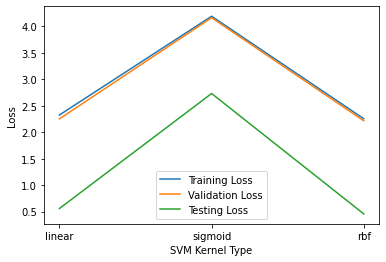

In [13]:
from sklearn.svm import SVC

training_loss = []
validation_loss = []
testing_loss = []
kernel_types = ["linear","sigmoid","rbf"]
for i in kernel_types:
  model = SVC(kernel = i) 
  model.fit(x_train,y_train)
  training_loss.append(log_loss(y_train,model.predict(x_train)))
  validation_loss.append(log_loss(y_validate,model.predict(x_validate)))
  testing_loss.append(log_loss(y_test,model.predict(X_test)))

plt.plot(kernel_types,training_loss,label = "Training Loss")
plt.plot(kernel_types,validation_loss,label = "Validation Loss")
plt.plot(kernel_types,testing_loss,label = "Testing Loss")
plt.xlabel("SVM Kernel Type")
plt.ylabel("Loss")
plt.legend()
plt.show()

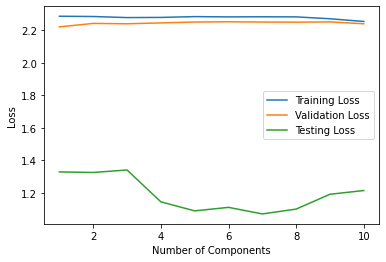

Accuracy score on Training set0.934
Accuracy score on Validation set0.9349777777777778
Accuracy score on Testing set0.9668550368550368


In [14]:
from sklearn.decomposition import PCA

training_loss = []
validation_loss = []
testing_loss = []
iteration = []
for i in range(1,11):
  iteration.append(i)
  pca = PCA(n_components=i)
  x_train_pca = pca.fit_transform(x_train)
  x_validate_pca = pca.fit_transform(x_validate)
  x_test_pca = pca.fit_transform(X_test)
  model = SVC(kernel = "rbf")
  model.fit(x_train_pca,y_train)
  training_loss.append(log_loss(y_train,model.predict(x_train_pca)))
  validation_loss.append(log_loss(y_validate,model.predict(x_validate_pca)))
  testing_loss.append(log_loss(y_test,model.predict(x_test_pca)))


plt.plot(iteration,training_loss,label = "Training Loss")
plt.plot(iteration,validation_loss,label = "Validation Loss")
plt.plot(iteration,testing_loss,label = "Testing Loss")
plt.xlabel("Number of Components")
plt.ylabel("Loss")
plt.legend()
plt.show()

pca = PCA(n_components = 4)
x_train_pca = pca.fit_transform(x_train)
x_validate_pca = pca.fit_transform(x_validate)
x_test_pca = pca.fit_transform(X_test)
model = SVC(kernel = "rbf")
model.fit(x_train_pca,y_train)
print("Accuracy score on Training set" + str(accuracy_score(y_train,model.predict(x_train_pca))))
print("Accuracy score on Validation set" + str(accuracy_score(y_validate,model.predict(x_validate_pca))))
print("Accuracy score on Testing set" + str(accuracy_score(y_test,model.predict(x_test_pca))))

In [15]:
model = SVC(kernel = "rbf") 
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
accuracy_score_train = accuracy_score(y_train,pred_train)
print("Accuracy Score For Training : " + str(accuracy_score_train))
print(classification_report(y_train,pred_train))

Accuracy Score For Training : 0.9347238095238095
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     97929
         1.0       0.73      0.05      0.09      7071

    accuracy                           0.93    105000
   macro avg       0.83      0.52      0.53    105000
weighted avg       0.92      0.93      0.91    105000



In [16]:
pred_validate = model.predict(x_validate)
accuracy_score_validate = accuracy_score(y_validate,pred_validate)
print("Accuracy Score For Validate : " + str(accuracy_score_validate))
print(classification_report(y_validate,pred_validate))

Accuracy Score For Validate : 0.9358444444444445
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     42045
         1.0       0.70      0.04      0.08      2955

    accuracy                           0.94     45000
   macro avg       0.82      0.52      0.52     45000
weighted avg       0.92      0.94      0.91     45000



In [17]:
pred_test = model.predict(X_test)
accuracy_score_test = accuracy_score(y_test,pred_test)
print("Accuracy Score For Testing : " + str(accuracy_score_test))
print(classification_report(y_test,pred_test))

Accuracy Score For Testing : 0.9867936117936118
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     80040
           1       0.93      0.23      0.37      1360

    accuracy                           0.99     81400
   macro avg       0.96      0.61      0.68     81400
weighted avg       0.99      0.99      0.98     81400

